# Importing Requried Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Load the dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  


<h3>Observation</h3>

1- All features have object data type.

2-There is no missing values.

3- Our Target Feature is also Categorical

In [5]:
# Checking Null values 
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
df.corr()

""


All the columns in the Data arew of object type

In [8]:
df['class'].nunique()

2

In [9]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [10]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

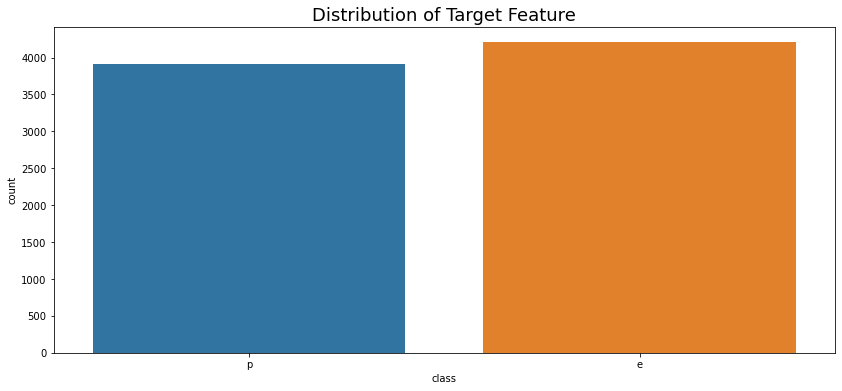

In [11]:
## Distribution of Target Variable 
plt.figure(figsize=(14,6))
plt.title('Distribution of Target Feature',fontsize=18)
sns.countplot(df['class'],data=df)
plt.show()

# Checking value Counts

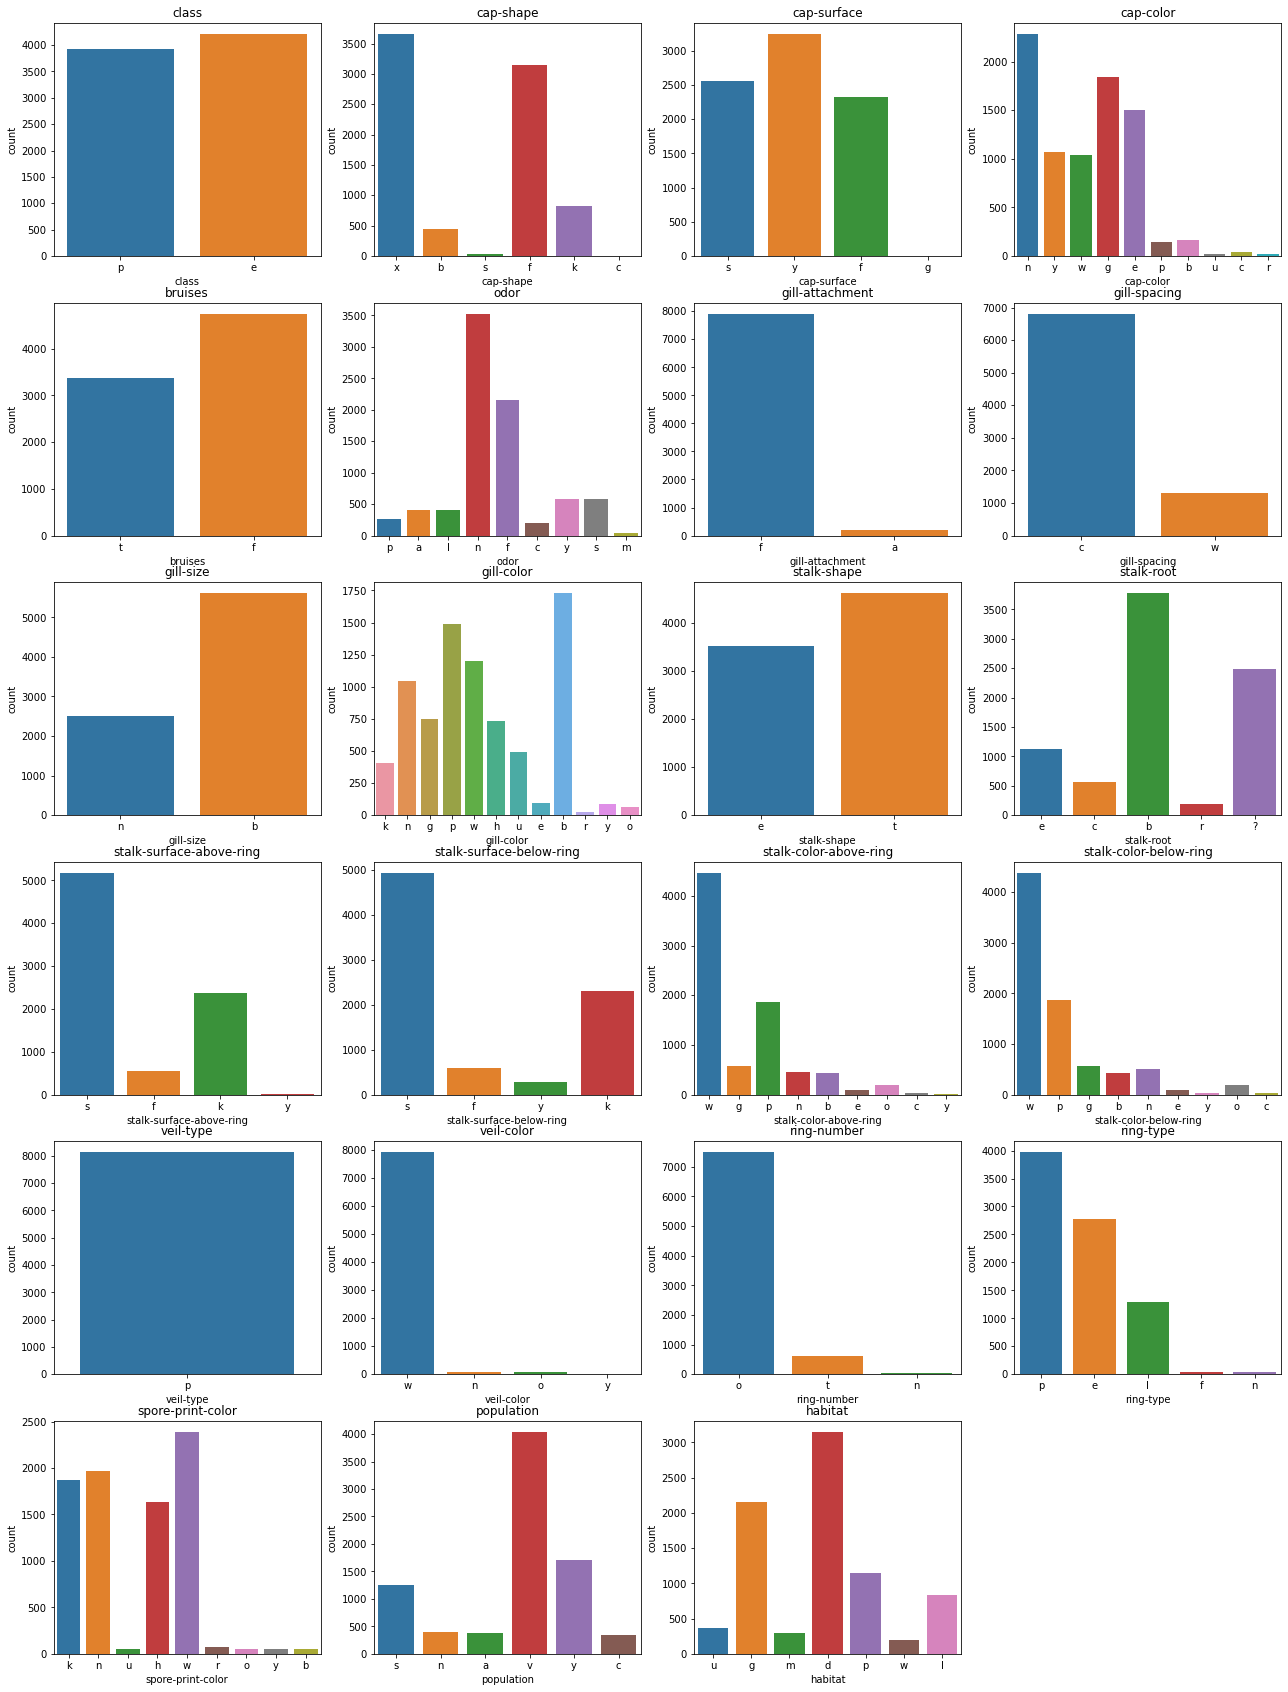

In [12]:
plt.figure(figsize=(22,30))
for no,column in enumerate(df):
    plt.subplot(6,4,no+1)
    plt.title(column)
    sns.countplot(df[column])
plt.show()

In [13]:
df.replace('?','Unknown',inplace=True)

<AxesSubplot:xlabel='stalk-root', ylabel='count'>

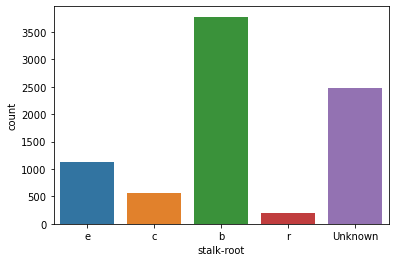

In [14]:
sns.countplot(df['stalk-root'])

In [15]:
df['stalk-root'].unique()

array(['e', 'c', 'b', 'r', 'Unknown'], dtype=object)

# Separating X & Y

In [16]:
X=df.drop(['class'],axis=1)
y=df['class'].values

In [17]:
le = LabelEncoder()
y = le.fit_transform(y)

In [18]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.metrics import f1_score,classification_report,confusion_matrix,accuracy_score,recall_score,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [20]:
def BestPerforming_model(pipe,X,y):
    finalf1score=0
    finalrandomstate=0
    precision=0
    recall = 0
    confmetrix = 0
    accuracy=0
    classifi_report = 0
    cross_val_score = 0
    for randomstate in range(42,100):
        X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=randomstate)
        pipe.fit(X_train,y_train)
        y_pred = pipe.predict(X_test)
        f1_scor = f1_score(y_test,y_pred)
        
        if f1_scor>finalf1score:
            finalf1score = f1_scor
            finalrandomstate = randomstate
            accuracy = accuracy_score(y_test,y_pred)
            confmetrix = confusion_matrix(y_test,y_pred)
            recall = recall_score(y_test,y_pred)
            precision=precision_score(y_test,y_pred)
            classifi_report = classification_report(y_test,y_pred)

            
    print("maximum f1_score is at random state :",finalrandomstate," and it is :",finalf1score)
    print()
    print("maximum accuracy at random state :",finalrandomstate," and it is :",accuracy)  
    print()
    print("maximum confmetrix at random state :",finalrandomstate," and it is :",confmetrix)
    print()
    print("maximum recall at random state :",finalrandomstate," and it is :",recall)
    print()
    print("maximum precision at random state :",finalrandomstate," and it is :",precision)
    print()
    print("maximum classifi_report at random state :",finalrandomstate," and it is :",classifi_report)  
    print()
    print('Mean f1 score at ' ,finalrandomstate , ' and mean cross_val_score is',cross_val_score)

# Logistic Regression

In [21]:
step1 = ColumnTransformer([
        ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),slice(0,X.shape[1]+1))  
        ],remainder='passthrough')

step2 =LogisticRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])


In [22]:
BestPerforming_model(pipe,X,y)

maximum f1_score is at random state : 42  and it is : 1.0

maximum accuracy at random state : 42  and it is : 1.0

maximum confmetrix at random state : 42  and it is : [[1040    0]
 [   0  991]]

maximum recall at random state : 42  and it is : 1.0

maximum precision at random state : 42  and it is : 1.0

maximum classifi_report at random state : 42  and it is :               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031


Mean f1 score at  42  and mean cross_val_score is 0


# Decision Tree Classifier

In [23]:
step1 = ColumnTransformer([
        ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),slice(0,X.shape[1]+1))  
        ],remainder='passthrough')

step2 =DecisionTreeClassifier()


pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])


In [24]:
BestPerforming_model(pipe,X,y)

maximum f1_score is at random state : 42  and it is : 1.0

maximum accuracy at random state : 42  and it is : 1.0

maximum confmetrix at random state : 42  and it is : [[1040    0]
 [   0  991]]

maximum recall at random state : 42  and it is : 1.0

maximum precision at random state : 42  and it is : 1.0

maximum classifi_report at random state : 42  and it is :               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031


Mean f1 score at  42  and mean cross_val_score is 0


# Support Vector Machine

In [25]:
step1 = ColumnTransformer([
        ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),slice(0,X.shape[1]+1))  
        ],remainder='passthrough')

step2 =SVC()


pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])


In [26]:
BestPerforming_model(pipe,X,y)

maximum f1_score is at random state : 42  and it is : 1.0

maximum accuracy at random state : 42  and it is : 1.0

maximum confmetrix at random state : 42  and it is : [[1040    0]
 [   0  991]]

maximum recall at random state : 42  and it is : 1.0

maximum precision at random state : 42  and it is : 1.0

maximum classifi_report at random state : 42  and it is :               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031


Mean f1 score at  42  and mean cross_val_score is 0


# Random Forest Classifier¶


In [27]:
step1 = ColumnTransformer([
        ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),slice(0,X.shape[1]+1))  
        ],remainder='passthrough')

step2 =RandomForestClassifier()


pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])


In [28]:
BestPerforming_model(pipe,X,y)

maximum f1_score is at random state : 42  and it is : 1.0

maximum accuracy at random state : 42  and it is : 1.0

maximum confmetrix at random state : 42  and it is : [[1040    0]
 [   0  991]]

maximum recall at random state : 42  and it is : 1.0

maximum precision at random state : 42  and it is : 1.0

maximum classifi_report at random state : 42  and it is :               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031


Mean f1 score at  42  and mean cross_val_score is 0


# KNeighbors Classifier

In [29]:
step1 = ColumnTransformer([
        ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),slice(0,X.shape[1]+1))  
        ],remainder='passthrough')

step2 =KNeighborsClassifier()


pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

In [30]:
BestPerforming_model(pipe,X,y)

maximum f1_score is at random state : 42  and it is : 1.0

maximum accuracy at random state : 42  and it is : 1.0

maximum confmetrix at random state : 42  and it is : [[1040    0]
 [   0  991]]

maximum recall at random state : 42  and it is : 1.0

maximum precision at random state : 42  and it is : 1.0

maximum classifi_report at random state : 42  and it is :               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031


Mean f1 score at  42  and mean cross_val_score is 0


# Checking For the best working Model

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
algos = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)
for i in algos:
    step1 = ColumnTransformer([
            ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),slice(0,X.shape[1]+1))  
            ],remainder='passthrough')

    step2 = i

    pipe = Pipeline([
        ('step1',step1),
        ('step2',step2)
    ])
    
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    print()
    print("Classification Metrics for" ,str(i)[0:-2])
    print('Accucacy score',accuracy_score(y_test,y_pred))
    print('f1_score',f1_score(y_test,y_pred))
    print('Mean f1 score ',cross_val_score(pipe,X,y,cv=7,scoring='f1').mean())
    print('Confusion matrix',confusion_matrix(y_test,y_pred))
    print('Classification report',classification_report(y_test,y_pred))
    print('standard devation of f1 score',cross_val_score(pipe,X,y,cv=7,scoring='f1').std())
    print('Cross Val score',cross_val_score(pipe,X,y,cv=7,scoring='f1'))
    print('__________________________________________________________________________')
    


Classification Metrics for LogisticRegression
Accucacy score 1.0
f1_score 1.0
Mean f1 score  0.9573043567951975
Confusion matrix [[843   0]
 [  0 782]]
Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

standard devation of f1 score 0.0663210290209614
Cross Val score [0.86294416 1.         1.         0.99730942 1.         0.99821429
 0.84266263]
__________________________________________________________________________

Classification Metrics for DecisionTreeClassifier
Accucacy score 1.0
f1_score 1.0
Mean f1 score  0.9690751447690769
Confusion matrix [[843   0]
 [  0 782]]
Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00 

# Testing for random state = 44 for SVM

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=44)
step1 = ColumnTransformer([
        ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),slice(0,X.shape[1]+1))  
        ],remainder='passthrough')

step2 = SVC()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('Accucacy score',accuracy_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('Mean f1 score ',cross_val_score(pipe,X,y,cv=7,scoring='f1').mean())
print('Confusion matrix',confusion_matrix(y_test,y_pred))
print('Classification report',classification_report(y_test,y_pred))
print('standard devation of f1 score',cross_val_score(pipe,X,y,cv=7,scoring='f1').std())
print('Cross Val score',cross_val_score(pipe,X,y,cv=7,scoring='f1'))
print('__________________________________________________________________________')


Accucacy score 1.0
f1_score 1.0
Mean f1 score  0.9370139622626235
Confusion matrix [[803   0]
 [  0 822]]
Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       803
           1       1.00      1.00      1.00       822

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

standard devation of f1 score 0.10752520933131038
Cross Val score [0.7037037  1.         1.         1.         1.         1.
 0.85539403]
__________________________________________________________________________


# Since Decission Tree is our best performing model, We train our model using Decission Tree

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)

step1 = ColumnTransformer([
        ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),slice(0,X.shape[1]+1))  
        ],remainder='passthrough')

step2 = DecisionTreeClassifier(criterion='gini',max_depth=5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred =pipe.predict(X_test)
print('F1 score',f1_score(y_test,y_pred))
print()
print('Accuracy score',accuracy_score(y_test,y_pred))
print()
print('confusion_matrix')
print(confusion_matrix(y_test,y_pred))
print()
print('Classification report')
print(classification_report(y_test,y_pred))

F1 score 1.0

Accuracy score 1.0

confusion_matrix
[[843   0]
 [  0 782]]

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# Saving the model

In [36]:
import pickle

In [37]:
pickle.dump(pipe,open('pipe.pkl','wb'))